In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

In [2]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [3]:
ds_train

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [4]:
ds_test

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [6]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [7]:
null_values(ds_train)

In [8]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [17]:
def outliers(dataset):
    for cols in dataset.select_dtypes(exclude="object").columns:
        print(cols)
        plt.figure(figsize=(20,8))
        plt.boxplot(dataset[cols], vert=False)
        plt.show()
        print("---------------------------------------------------------------------------------------------------------")

deg_C


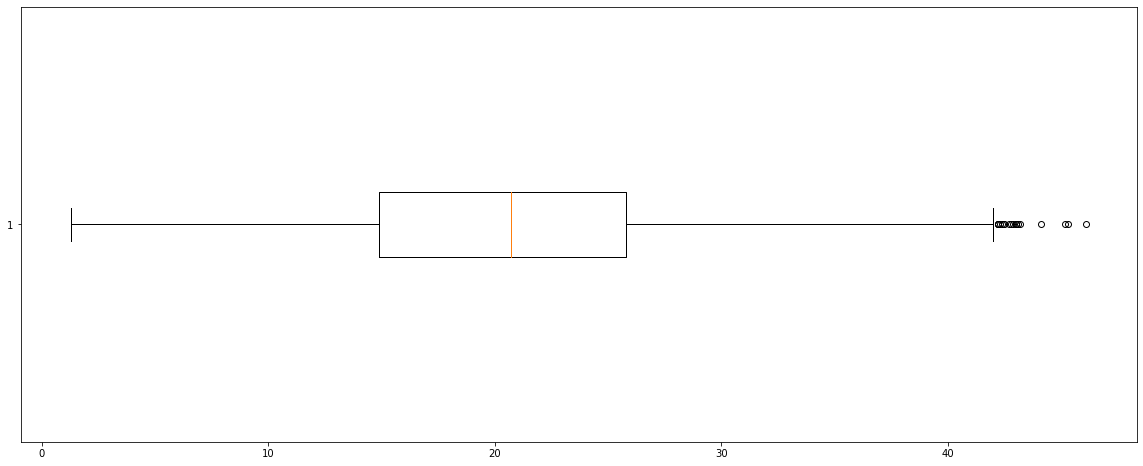

---------------------------------------------------------------------------------------------------------
relative_humidity


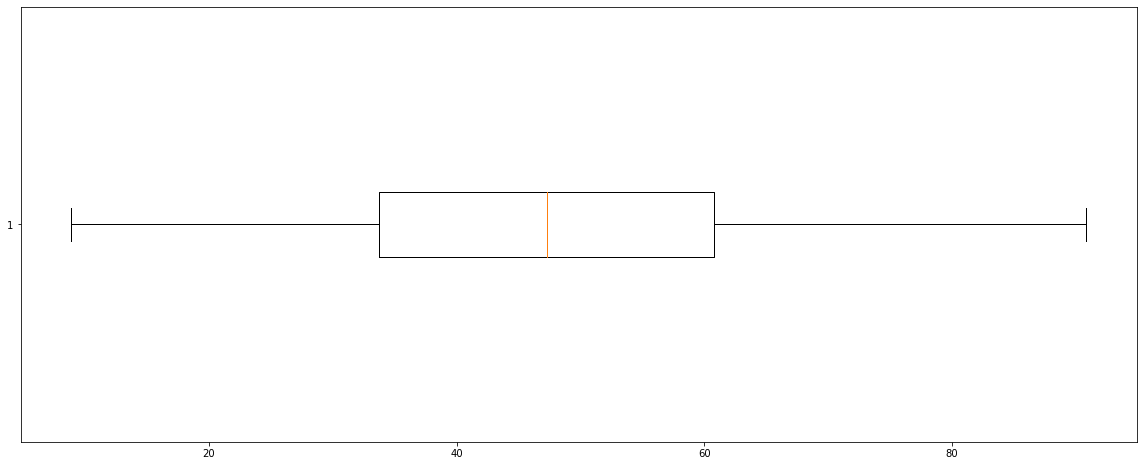

---------------------------------------------------------------------------------------------------------
absolute_humidity


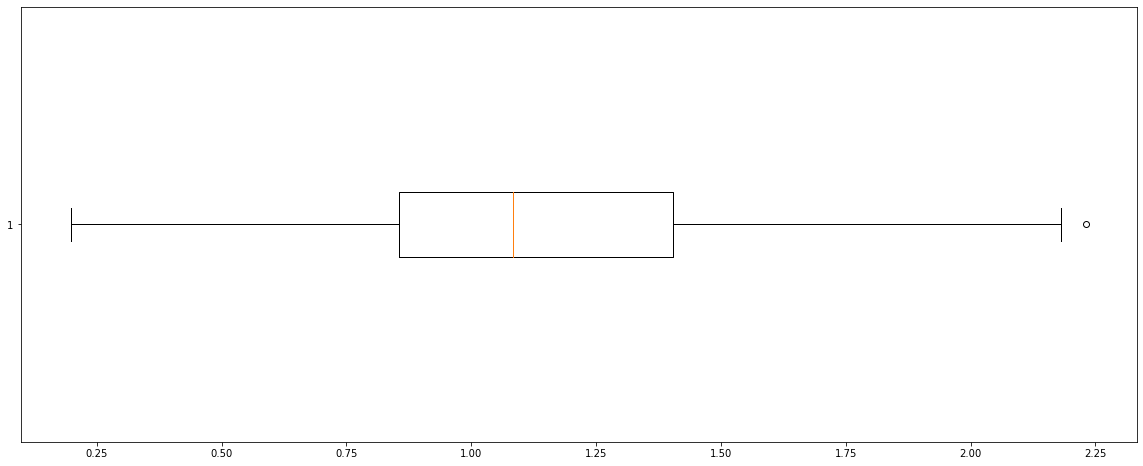

---------------------------------------------------------------------------------------------------------
sensor_1


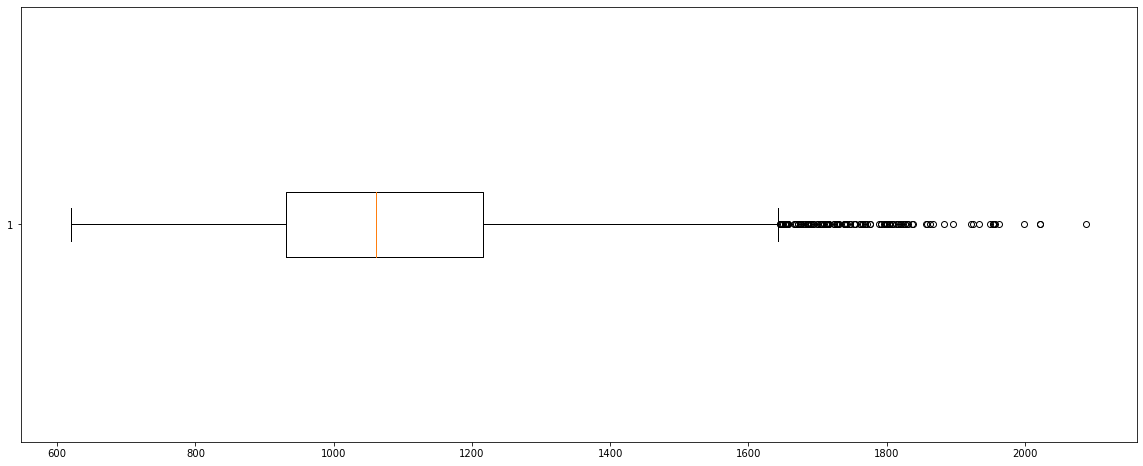

---------------------------------------------------------------------------------------------------------
sensor_2


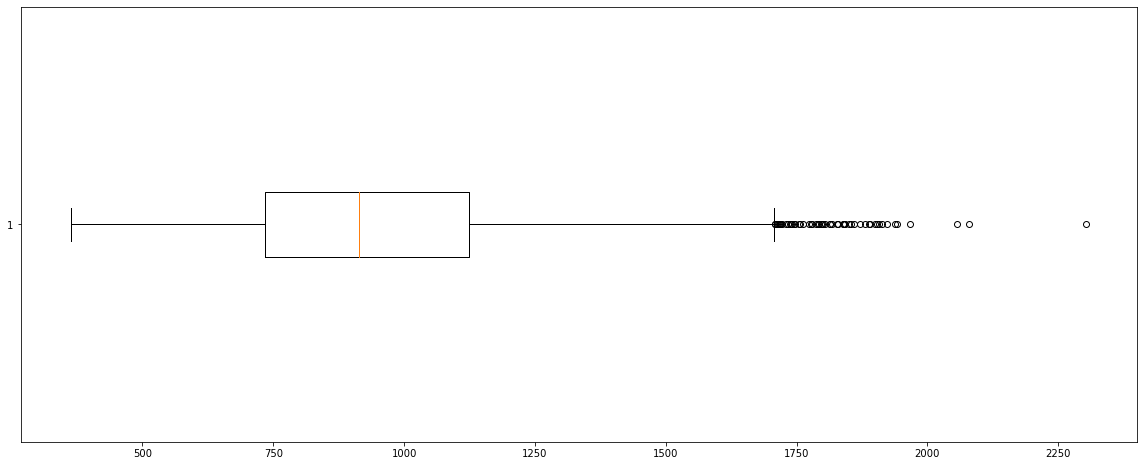

---------------------------------------------------------------------------------------------------------
sensor_3


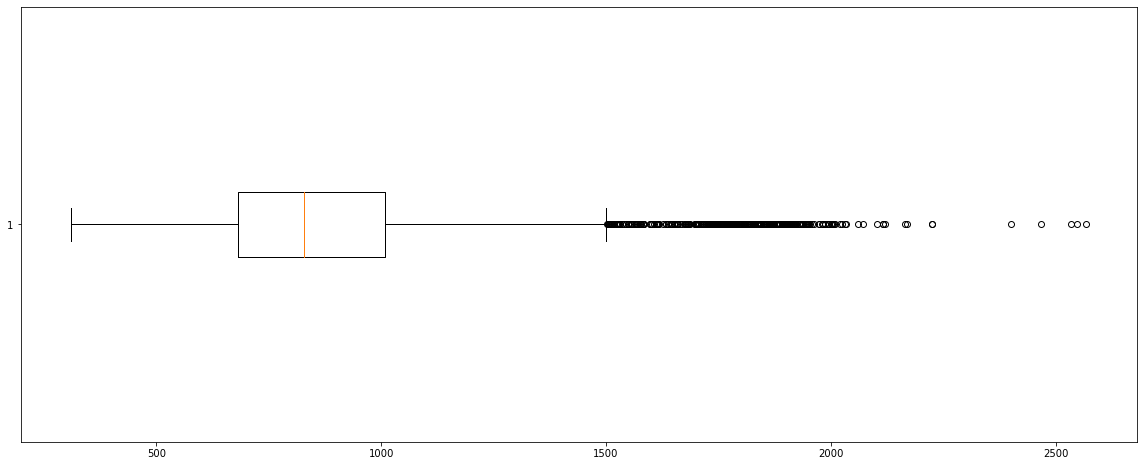

---------------------------------------------------------------------------------------------------------
sensor_4


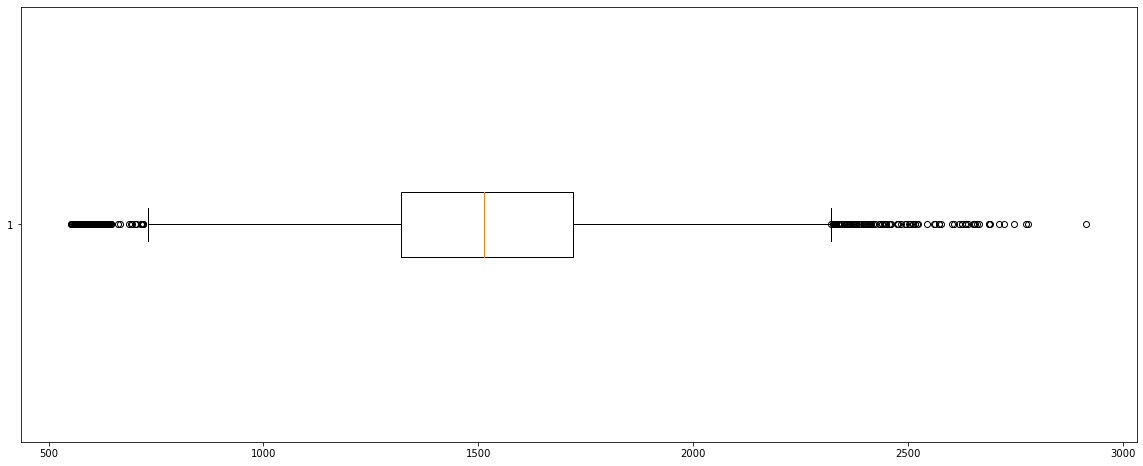

---------------------------------------------------------------------------------------------------------
sensor_5


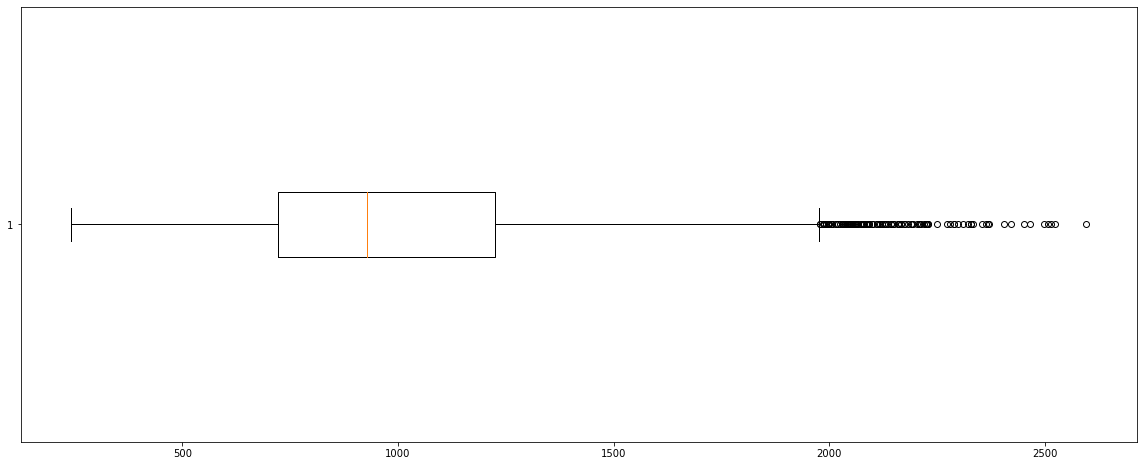

---------------------------------------------------------------------------------------------------------
target_carbon_monoxide


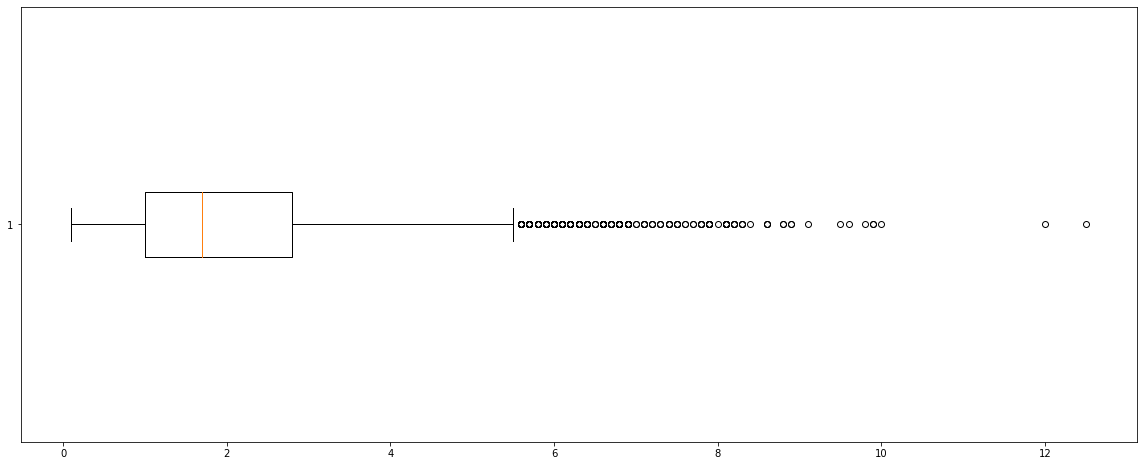

---------------------------------------------------------------------------------------------------------
target_benzene


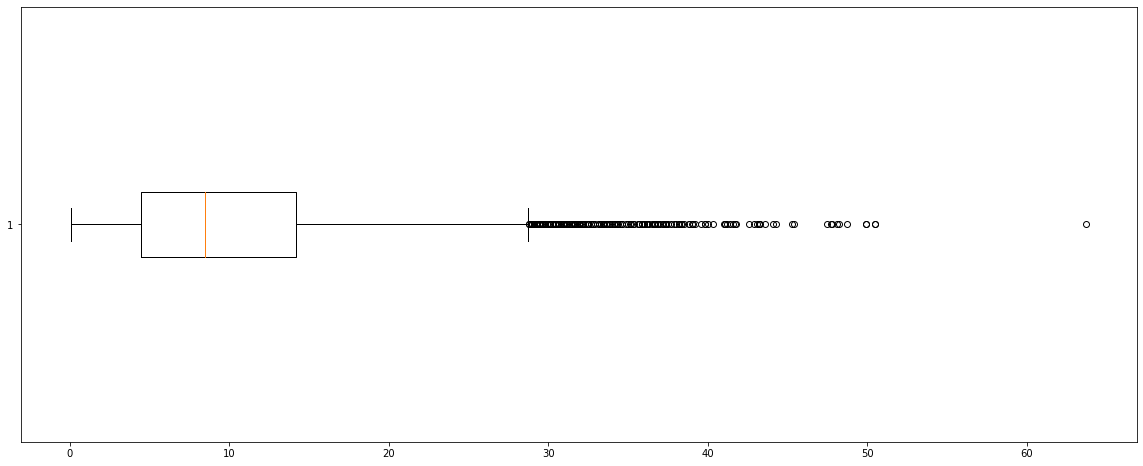

---------------------------------------------------------------------------------------------------------
target_nitrogen_oxides


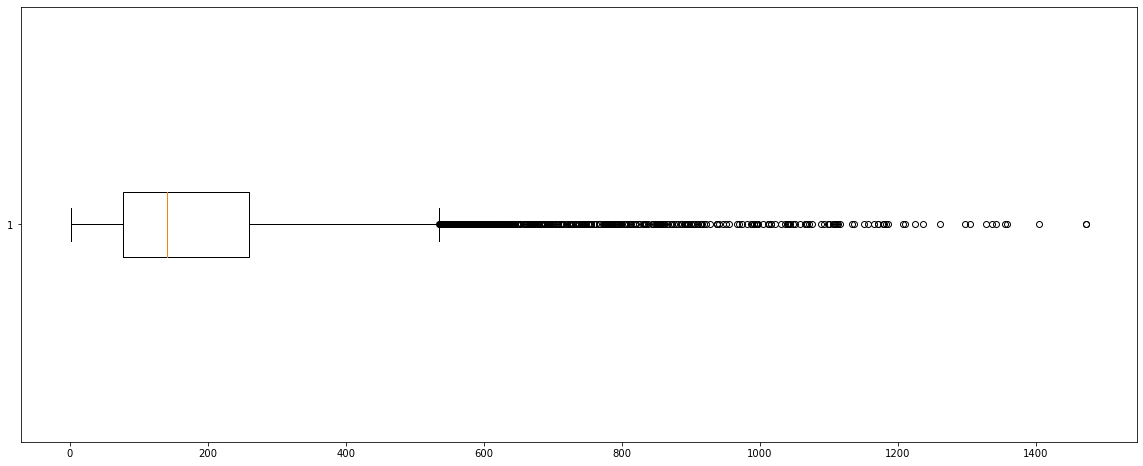

---------------------------------------------------------------------------------------------------------


In [18]:
outliers(ds_train)

In [19]:
ds_train.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [35]:
new_target = np.array(pd.concat([ds_train[ds_train.columns[x]] for x in range(-3,0,1)], axis=1))

In [36]:
new_target

array([[  2.5,  12. , 167.7],
       [  2.1,   9.9,  98.9],
       [  2.2,   9.2, 127.1],
       ...,
       [  1.6,   5.2, 227.4],
       [  1.5,   4.6, 199.8],
       [  1.4,   4.1, 186.5]])

In [37]:
new_target_1 = np.array([ds_train[ds_train.columns[x]] for x in range(-3,0,1)])

In [39]:
new_target_1 = new_target_1.T

In [40]:
new_target_1

array([[  2.5,  12. , 167.7],
       [  2.1,   9.9,  98.9],
       [  2.2,   9.2, 127.1],
       ...,
       [  1.6,   5.2, 227.4],
       [  1.5,   4.6, 199.8],
       [  1.4,   4.1, 186.5]])

In [45]:
X = ds_train.iloc[:,1:-3].values

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, new_target_1, random_state=0)

In [47]:
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
lr.score(X_train,y_train)

0.8249533133804693

In [52]:
lr.score(X_valid,y_valid)

0.7988192275088801

In [53]:
X_train_predict = lr.predict(X_train)

In [54]:
X_train_predict

array([[  0.79653939,   3.58012407,  28.72088443],
       [  0.98560258,   6.79606957,  43.55743685],
       [  1.61230555,   8.28288958, 166.68940353],
       ...,
       [  3.03157215,  15.76088856, 279.50003237],
       [  1.90539064,  10.26618304, 166.87191742],
       [  2.02184282,  11.76895875, 115.96679   ]])

In [55]:
y_train

array([[  0.5,   4.2,  63.7],
       [  1.4,   7.4,  57. ],
       [  1.6,   9.9, 205.2],
       ...,
       [  2.4,  13.8, 139.6],
       [  1.5,   7.8, 106.1],
       [  1.8,  10.3, 130. ]])

In [59]:
mean_squared_log_error(y_valid, lr.predict(X_valid),multioutput='raw_values')

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [60]:
y_ds = pd.DataFrame(y_train)

In [61]:
y_ds

,0,1,2
0,0.5,4.2,63.7
1,1.4,7.4,57.0
2,1.6,9.9,205.2
3,4.2,20.2,280.1
4,1.4,6.1,77.0
...,...,...,...
5328,1.0,5.5,143.9
5329,1.3,5.9,74.2
5330,2.4,13.8,139.6
5331,1.5,7.8,106.1


In [65]:
y_ds.value_counts()

0     1     2     
0.7   4.1   41.8      2
      3.8   44.6      2
1.6   9.7   84.4      2
      8.3   91.8      2
1.0   4.7   54.1      2
                     ..
1.3   4.7   79.7      1
      4.6   205.8     1
            159.8     1
            78.0      1
12.5  48.1  1472.3    1
Length: 5326, dtype: int64

In [66]:
for i in y_train:
    for j in i:
        if j<0:
            print(j)

In [69]:
for i in y_train:
    for j in i:
        if j>0:
            print(j)

0.5
4.2
63.7
1.4
7.4
57.0
1.6
9.9
205.2
4.2
20.2
280.1
1.4
6.1
77.0
2.6
14.4
303.8
1.4
8.6
91.2
1.7
8.4
79.8
1.9
9.6
111.2
0.7
5.5
44.2
2.0
11.0
333.1
1.5
4.6
99.8
1.2
6.0
207.6
1.8
7.3
74.0
5.0
26.4
349.0
1.6
5.3
103.0
2.3
14.7
255.4
2.2
14.6
133.0
4.9
13.6
505.7
1.7
13.4
239.4
8.0
37.3
1354.5
1.5
5.4
94.8
1.4
8.6
124.7
1.9
7.0
321.8
3.0
15.1
555.4
0.9
5.7
49.5
2.0
5.8
212.8
0.5
1.4
100.0
0.5
2.8
26.3
0.8
4.9
153.5
1.9
9.0
123.2
1.2
4.6
197.1
3.5
22.4
190.0
3.1
21.1
164.4
3.4
6.6
329.7
1.5
9.9
93.1
1.6
10.1
96.0
1.3
6.5
47.9
3.8
0.1
852.8
1.8
8.3
92.5
3.9
19.8
320.3
4.5
20.4
249.3
2.2
12.4
230.9
1.9
10.0
177.5
1.8
9.7
175.0
4.5
0.1
142.8
1.0
0.1
66.2
1.0
6.1
41.8
1.4
7.3
183.8
0.7
2.4
78.8
4.2
22.5
516.8
1.7
9.3
79.2
2.0
7.3
329.8
0.7
2.4
114.5
1.4
7.6
113.2
1.2
7.3
96.7
2.8
14.5
212.2
4.9
21.5
566.2
1.5
11.2
65.0
3.8
21.5
362.9
1.9
11.9
223.7
0.4
3.1
35.3
1.3
10.6
111.7
1.8
8.2
148.0
2.5
17.1
158.6
2.2
11.5
274.4
1.9
10.4
195.7
1.7
9.2
325.7
5.5
33.5
790.4
0.9
4.4
38.7
0.3
0.9
50.4
1

0.4
2.0
23.3
1.6
8.5
79.5
1.0
3.4
67.7
3.9
26.4
509.8
1.0
3.9
48.9
5.3
22.1
253.8
0.8
5.9
135.4
1.5
0.1
85.8
0.3
0.7
12.6
0.5
1.7
21.4
0.9
6.0
94.1
1.7
8.3
152.5
2.4
12.4
131.6
2.0
8.6
128.1
4.0
23.7
446.2
1.5
6.9
231.3
1.7
7.7
93.1
1.0
5.3
51.8
0.8
3.8
72.7
0.3
0.6
10.0
2.9
14.6
147.2
2.9
14.2
334.4
0.7
5.9
70.1
3.0
18.0
258.1
0.5
2.0
66.5
0.4
2.9
22.4
0.4
0.5
60.8
0.6
3.9
53.9
2.9
14.7
153.9
1.6
7.0
64.6
2.6
14.0
283.1
2.7
10.9
164.2
1.2
5.5
82.2
1.6
8.1
184.2
0.3
2.2
24.2
0.6
2.6
76.3
1.4
5.6
109.6
2.8
12.2
176.0
3.9
18.0
724.2
2.7
13.7
134.1
1.9
7.5
256.2
1.9
12.4
118.8
1.2
4.9
65.0
2.0
10.5
253.0
3.9
28.5
358.0
4.1
21.5
158.5
1.5
5.7
81.0
0.5
4.0
30.4
0.8
0.1
47.0
1.4
6.4
190.6
0.9
6.0
91.1
2.8
16.9
176.4
2.5
10.6
336.8
4.2
19.3
448.4
3.5
16.0
504.0
1.4
7.4
188.7
0.6
2.6
63.6
6.6
36.7
987.5
2.2
10.5
277.7
10.0
50.5
1341.6
0.8
4.5
108.0
2.0
10.8
126.1
5.8
26.6
281.0
5.2
36.6
470.3
2.2
12.9
158.6
2.5
11.2
131.6
1.7
7.3
85.4
2.1
9.0
162.2
1.1
3.1
147.4
0.9
2.7
46.1
1.8
7.4
113.4
3.2


4.5
21.6
695.4
1.5
9.6
112.4
0.7
0.1
71.0
1.1
4.1
57.1
1.4
6.7
62.0
5.5
23.4
526.1
1.2
7.4
83.4
2.2
13.4
163.8
2.0
12.1
124.5
1.5
4.7
74.4
1.4
7.0
139.6
0.1
9.0
59.2
3.5
16.6
397.9
2.9
20.9
186.7
2.0
11.9
146.5
1.1
5.7
39.0
1.8
9.6
127.2
1.2
0.1
47.4
3.4
20.0
277.3
1.7
10.2
106.0
0.9
3.2
59.3
5.7
22.0
294.0
1.3
6.4
70.6
4.0
19.0
521.2
0.9
3.8
251.5
2.0
13.0
221.5
1.4
7.4
59.2
1.9
9.6
99.8
5.0
30.1
326.9
0.6
5.4
68.6
5.6
28.6
654.2
4.1
20.2
805.4
1.4
8.6
101.8
3.5
12.9
570.2
4.8
24.8
225.8
0.7
4.3
67.8
1.0
3.9
117.7
1.1
7.9
52.5
1.8
6.8
314.9
1.3
6.1
98.6
0.9
4.7
121.0
1.9
8.6
203.3
2.0
11.1
102.2
1.5
6.1
176.4
1.9
9.4
101.5
2.4
12.7
201.6
0.5
2.6
79.8
1.2
6.9
84.8
2.6
11.9
131.4
3.1
10.8
383.2
2.1
10.6
97.0
1.9
10.2
154.4
2.6
13.1
276.6
4.4
25.7
446.4
4.1
20.4
237.6
4.9
25.8
805.0
1.9
10.0
92.1
5.0
15.1
464.3
2.7
17.7
234.4
2.7
14.6
159.4
3.8
15.7
188.0
1.7
10.6
90.0
1.6
10.4
91.4
1.9
10.3
171.4
0.6
2.1
73.6
0.6
5.1
141.6
1.9
8.5
242.2
1.9
10.3
196.9
2.0
9.7
100.3
0.5
2.5
10.9
1.7
7.7


3.2
13.9
597.8
1.0
6.4
100.0
2.8
16.1
340.3
4.4
19.0
703.0
1.5
9.2
73.1
0.4
1.5
29.7
0.4
2.6
21.8
1.2
8.6
66.0
2.2
9.7
177.2
3.0
9.0
362.9
0.6
3.6
31.3
1.9
9.3
94.9
2.6
12.9
211.1
0.7
1.4
21.0
2.7
14.0
134.5
3.1
10.6
464.5
1.6
8.7
91.4
1.1
5.4
102.0
0.6
3.5
49.2
0.5
1.9
40.8
1.1
4.9
57.2
2.4
8.3
340.8
3.4
16.5
567.8
1.1
3.7
59.8
5.8
30.6
565.8
2.3
11.0
126.0
0.5
3.7
62.4
3.8
22.9
685.8
4.7
18.5
607.9
0.9
3.1
174.4
3.7
17.8
246.5
1.8
12.0
127.1
1.4
0.1
202.5
1.2
3.8
74.1
2.5
14.0
168.0
4.9
24.2
627.7
3.5
12.7
553.9
3.5
10.2
389.6
3.8
22.4
518.7
4.9
22.9
795.8
3.2
12.4
403.8
0.5
1.3
20.1
1.4
6.6
134.6
2.4
9.3
137.6
3.5
10.6
444.1
0.1
1.4
17.5
0.3
0.5
30.2
2.9
16.1
177.5
2.9
16.5
369.0
4.9
29.0
248.0
1.4
0.1
67.0
1.9
11.5
127.5
2.7
17.2
324.5
3.2
15.9
411.1
4.3
21.8
226.1
4.5
23.3
726.2
1.1
5.2
41.7
3.4
19.4
259.7
2.9
11.8
399.0
2.1
13.1
121.0
0.8
1.4
75.2
2.2
0.1
89.8
0.6
3.8
26.5
0.3
1.8
25.4
2.2
17.7
214.8
1.3
5.9
247.9
1.1
8.2
124.4
2.3
9.6
179.2
1.1
4.7
53.5
2.8
14.8
193.0
1.7
7.7
13

9.6
205.0
0.6
3.6
46.5
2.4
8.6
151.3
4.6
30.1
284.2
2.5
10.8
170.1
1.9
9.2
97.5
0.7
2.4
32.3
1.0
5.2
50.9
0.8
2.0
109.6
2.9
17.4
374.7
1.8
10.4
196.0
0.9
7.7
84.0
0.3
3.5
43.2
0.4
1.4
17.7
0.8
4.0
55.0
0.7
3.8
44.6
1.1
4.6
71.1
1.6
7.0
101.0
2.7
11.1
172.0
1.7
11.1
105.6
2.0
13.5
143.1
1.2
6.7
58.2
0.6
3.5
31.7
3.3
19.4
422.2
2.1
13.1
169.3
1.1
5.8
62.8
3.5
0.1
541.8
2.2
8.9
323.7
2.3
0.1
327.4
1.8
12.1
116.0
1.4
7.7
145.0
1.0
3.2
137.3
3.7
26.8
254.1
3.1
21.7
260.0
4.8
21.5
280.8
1.4
7.6
75.0
1.3
4.6
78.0
3.9
13.6
242.4
1.0
3.8
61.6
0.3
0.9
18.6
1.6
6.0
92.1
1.7
7.8
269.5
1.2
5.0
142.8
1.0
5.0
61.7
2.1
9.3
312.0
2.7
15.4
296.4
2.4
12.7
146.3
1.4
7.4
194.4
3.1
17.2
342.0
4.5
25.2
631.7
5.0
28.7
423.4
1.3
3.6
155.3
2.3
13.4
150.7
2.0
11.5
113.3
4.6
28.6
581.8
0.8
3.2
58.2
3.9
19.8
635.4
0.3
1.0
38.9
2.0
11.2
155.5
0.3
0.8
23.2
3.9
22.9
380.7
3.3
14.9
447.0
2.6
14.0
243.0
0.8
4.3
108.0
1.0
5.3
113.0
3.3
21.3
453.9
2.1
11.8
101.6
1.3
6.7
70.9
5.0
28.1
419.6
0.8
5.5
73.3
1.9
7.2
239.4
0.5


0.6
4.1
40.2
2.1
11.5
118.2
2.3
12.5
106.7
0.6
1.5
111.2
4.4
20.8
174.4
1.4
8.0
85.1
1.6
6.8
229.3
1.1
0.1
41.8
2.3
8.8
144.4
3.0
16.7
383.2
2.0
12.4
130.2
1.8
8.3
100.2
0.9
2.4
132.6
5.8
31.6
604.1
2.1
11.4
120.3
0.7
3.3
27.6
1.5
5.6
89.0
2.1
12.5
146.3
1.4
7.0
183.3
1.6
11.1
261.6
2.7
12.9
172.0
0.7
3.5
50.5
3.7
20.0
167.3
0.8
2.8
121.2
1.8
8.3
85.8
5.1
22.6
636.0
3.3
16.4
331.8
1.6
6.6
103.9
2.0
11.8
138.1
1.4
6.8
187.6
1.0
0.1
66.8
1.3
7.3
78.7
1.6
4.7
192.7
2.1
9.2
408.3
0.5
2.0
55.8
1.3
7.9
79.0
1.8
8.8
111.3
1.2
6.5
85.3
0.4
1.5
46.6
0.6
3.7
37.2
0.6
2.4
59.4
0.8
3.8
92.1
4.3
23.8
537.6
2.0
10.0
126.0
0.9
4.5
37.6
3.9
20.0
225.7
3.0
15.5
121.8
4.2
23.9
438.4
1.2
11.3
355.2
1.5
7.1
96.0
8.1
30.4
832.0
3.5
20.2
199.0
2.2
11.2
143.8
1.9
11.7
111.9
1.6
8.9
166.6
2.3
14.0
123.0
3.7
22.3
369.7
1.8
10.0
217.3
0.9
1.7
63.0
3.9
19.3
267.8
1.5
5.6
104.3
1.0
4.6
58.8
1.3
8.9
87.2
0.4
3.2
42.4
0.4
0.6
65.0
2.1
12.2
148.5
1.3
6.3
343.7
4.0
22.7
335.8
0.5
0.7
61.1
5.0
19.8
624.0
1.2
6.5
33.3


4.8
36.1
7.4
39.8
852.8
2.0
8.7
112.7
3.6
18.4
400.8
1.9
8.1
399.0
4.7
29.3
446.6
0.4
2.7
41.3
2.9
16.7
314.9
0.3
1.5
15.8
0.8
3.7
192.8
2.0
9.5
110.8
2.1
12.2
127.2
1.3
6.0
59.6
3.1
13.1
590.7
4.8
31.6
391.1
1.9
7.2
260.4
2.6
11.9
284.6
0.4
0.8
34.1
2.4
13.2
303.2
1.5
5.9
226.8
0.7
2.0
35.0
0.6
0.1
45.5
3.3
20.1
258.5
1.5
5.5
270.7
1.6
8.0
155.3
1.1
4.8
47.0
6.8
37.2
421.0
1.3
7.1
61.4
2.1
0.1
115.0
1.7
9.4
171.2
2.6
16.3
186.2
1.6
5.9
242.6
1.1
3.6
116.2
2.0
9.2
362.5
1.2
7.6
190.8
3.1
16.9
460.0
0.6
3.8
42.8
7.9
38.5
994.4
5.4
24.7
257.0
2.7
14.9
207.0
0.7
3.8
44.6
1.2
3.5
63.2
1.7
10.8
98.9
2.1
14.3
133.0
0.4
1.9
26.1
1.4
9.5
71.8
1.6
8.7
135.2
1.5
8.3
71.8
0.7
0.1
42.2
2.1
11.3
137.7
0.9
3.9
174.6
1.0
4.7
54.1
3.6
18.4
568.1
1.9
8.3
115.1
1.3
5.4
53.6
1.9
10.6
128.4
1.6
5.2
227.4
0.7
4.0
90.4
1.1
3.0
169.3
1.3
8.9
80.3
1.2
5.0
62.0
1.2
8.9
358.0
1.0
5.3
212.2
0.9
4.3
129.3
1.7
0.1
374.7
3.1
16.7
136.2
0.6
2.4
75.6
5.3
27.8
493.4
2.4
12.7
157.4
2.0
10.5
139.2
0.9
3.5
42.8
1.5
6.7
2

1.1
4.7
59.9
2.6
14.1
164.2
1.5
6.2
200.6
0.7
3.5
43.7
0.6
3.4
29.3
5.7
26.4
638.6
3.2
15.3
209.3
0.7
2.4
27.8
1.8
8.0
133.3
0.6
1.4
91.1
2.4
11.1
371.0
2.6
13.8
172.6
0.6
3.3
29.2
1.6
6.8
214.7
0.9
4.5
56.2
2.3
9.8
365.7
2.5
12.7
399.0
0.8
4.2
104.1
1.8
6.0
93.9
1.4
6.9
181.2
5.3
27.9
974.1
4.1
19.9
244.9
3.8
17.7
415.8
0.8
2.9
33.9
0.4
1.5
9.0
0.1
7.7
40.9
1.7
10.5
93.0
0.9
3.9
35.3
1.7
6.3
231.9
1.7
10.2
77.8
2.0
10.9
284.6
1.6
8.2
81.9
3.3
19.4
438.8
2.0
9.4
105.8
1.9
11.5
231.3
2.7
11.6
294.3
0.8
3.6
51.2
1.6
9.4
172.0
2.7
13.7
485.1
2.1
9.9
132.6
1.2
4.9
141.1
1.0
2.6
133.0
1.3
5.9
149.9
1.9
11.7
275.7
3.2
16.7
167.7
2.5
15.8
152.6
1.0
5.5
67.6
3.0
19.2
329.3
1.3
5.3
268.7
2.0
12.9
147.0
1.4
4.9
60.6
1.4
8.4
186.2
4.6
20.3
236.9
2.2
9.3
264.0
2.1
14.8
193.0
1.4
5.7
210.5
5.1
25.9
296.0
0.8
4.5
38.0
7.8
43.2
860.0
2.6
10.8
365.5
4.4
17.4
213.1
1.1
6.4
48.8
2.7
10.2
413.2
1.4
7.7
110.2
5.2
24.3
403.9
5.0
28.2
710.8
4.7
29.0
606.4
3.2
16.4
362.0
2.5
7.9
167.3
1.8
8.6
88.4
6.4
30.4
7